Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN. Adjunte enlace de acceso al dataset (enlace de la página de donde obtuvo los datos)

**Se realizó la busqueda en la pagina https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset**

In [208]:
import pandas as pd
import numpy as np

## **Realice la lectura del banco de datos e imprima las categorías que tiene**

In [209]:
df = pd.read_csv('Hotel Reservations.csv',encoding='windows-1252',sep=",")
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [210]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


## **Realice el proceso de limpieza de los datos, justificando cada una de las etapas utilizadas.**

In [211]:
df = df.drop('Booking_ID', axis=1)
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


Se realiza la eliminacion de la columna Booking_ID porque tiene datos irrelevantes solo es un identificador de reserva

In [212]:
#datos nulos
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## **En caso de ser necesario transforme los atributos categóricos a numéricos**

In [213]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns.values)

['type_of_meal_plan' 'room_type_reserved' 'market_segment_type'
 'booking_status']


In [214]:
for x1 in categorical_columns:
  print(df[x1].value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


In [215]:
from sklearn import preprocessing
for x1 in categorical_columns:
    transform_tt = preprocessing.LabelEncoder()
    df[x1] = transform_tt.fit_transform(df[x1])

In [216]:
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
5,2,0,0,2,1,0,0,346,2018,9,13,4,0,0,0,115.00,1,0
6,2,0,1,3,0,0,0,34,2017,10,15,4,0,0,0,107.55,1,1
7,2,0,1,3,0,0,3,83,2018,12,26,4,0,0,0,105.61,1,1
8,3,0,0,4,0,0,0,121,2018,7,6,3,0,0,0,96.90,1,1
9,2,0,0,5,0,0,3,44,2018,10,18,4,0,0,0,133.44,3,1


Se realiza la conversion de variables categoricas a numericas en este punto para que se muestren en la matriz de correlacion y tenerlas en cuenta para la seleccion de variables

## **Realice un análisis de correlación**

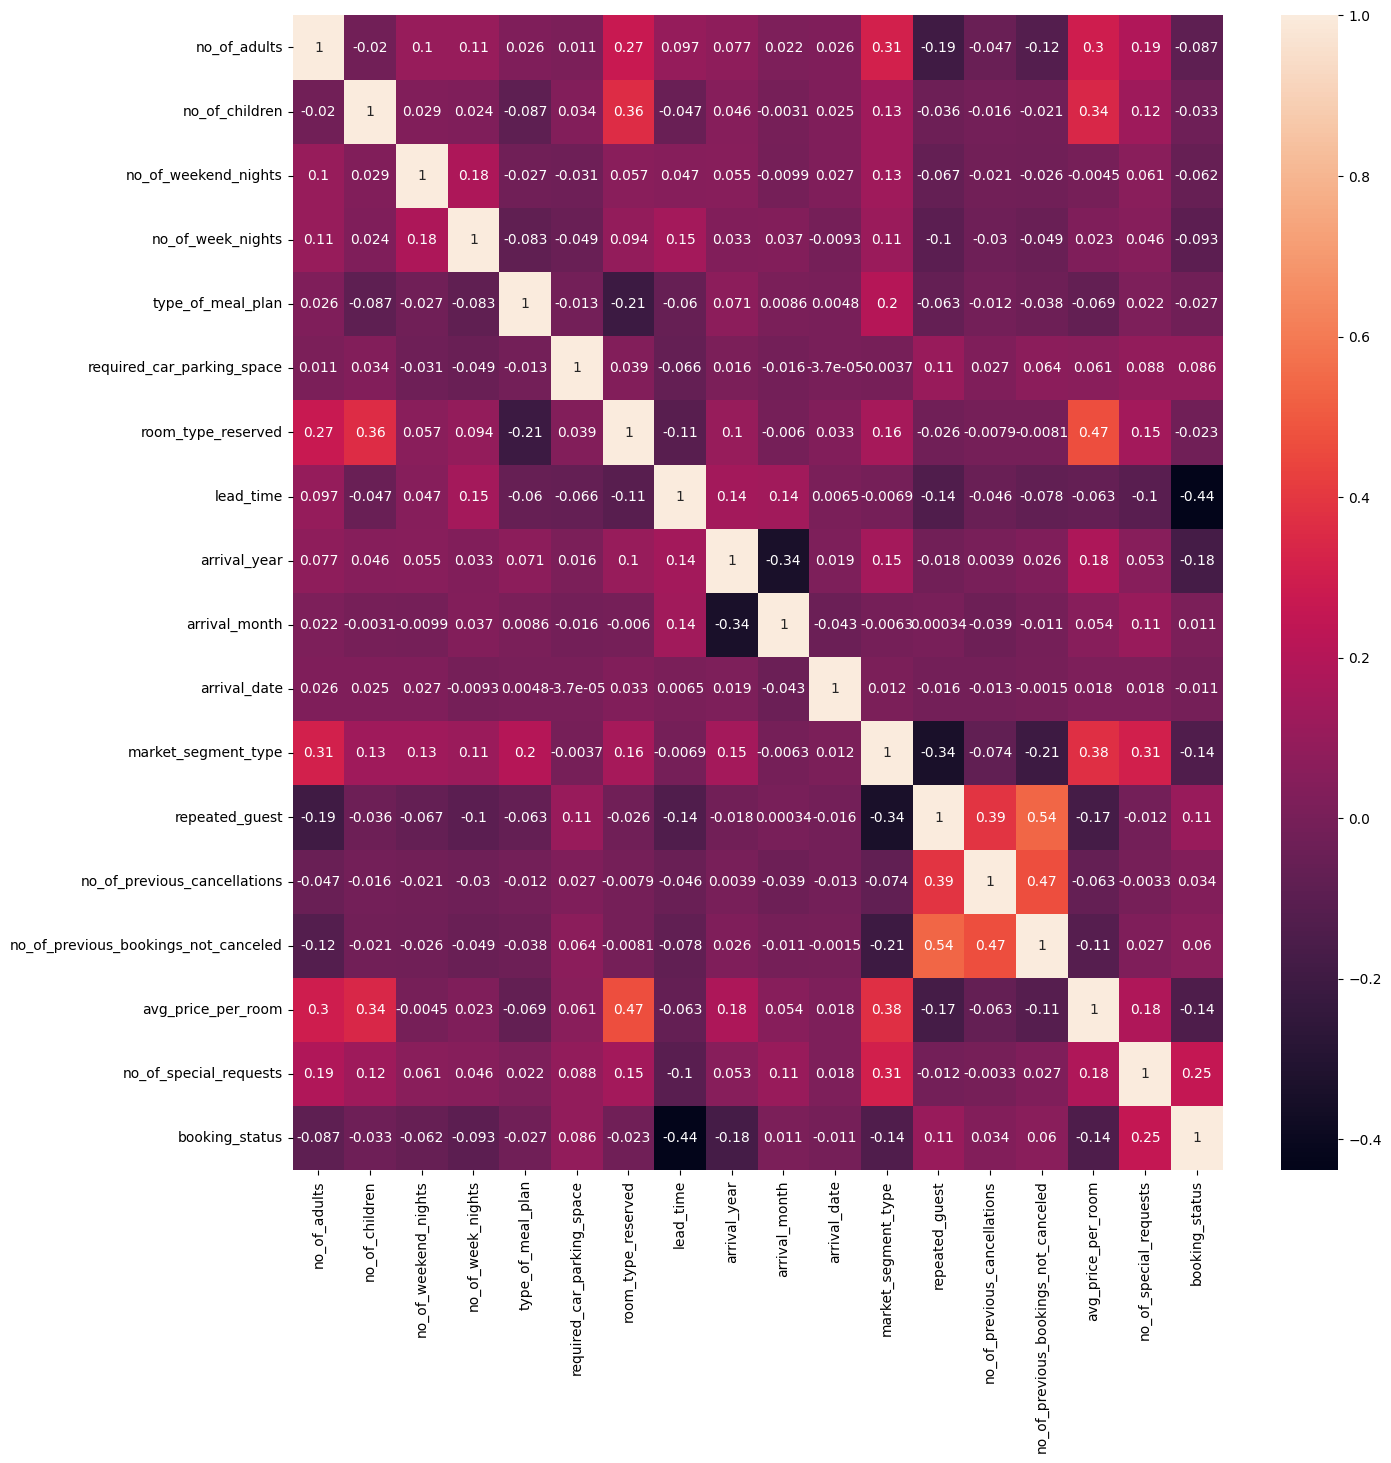

In [217]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sn.heatmap(corr_matrix, annot=True)
plt.show()

## **Seleccion de las variables dependientes e independientes**

In [218]:
# Separar las variables independientes (x) de las dependientes (y)
x = np.array(df[['type_of_meal_plan', 'room_type_reserved', 'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests','repeated_guest','avg_price_per_room','lead_time']].values)
y = np.array(df['booking_status'].values)
print(x.shape)
y = y.reshape(-1, 1)
print(y.shape)

(36275, 8)
(36275, 1)


## **Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o estandarización) realice la justificación del método seleccionado para su conjunto de datos.**

In [219]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-0.49197217 -0.50641126 -0.06339327 ... -0.16220995 -1.09503276
   1.61489628]
 [ 2.37030377 -0.50641126 -0.06339327 ... -0.16220995  0.09280591
  -0.93370069]
 [-0.49197217 -0.50641126 -0.06339327 ... -0.16220995 -1.2375278
  -0.98025041]
 ...
 [-0.49197217 -0.50641126 -0.06339327 ... -0.16220995 -0.14345087
   0.73045167]
 [ 2.37030377 -0.50641126 -0.06339327 ... -0.16220995 -0.25431201
  -0.2587298 ]
 [-0.49197217 -0.50641126 -0.06339327 ... -0.16220995  1.65996637
   1.41705998]]


Se realiza la normalización de los datos para que estén la misma escala

In [220]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False)
y = oh.fit_transform(y)
print(y)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [221]:
print(y)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


## **Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.**

In [222]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25392, 8)
(10883, 8)
(25392, 2)
(10883, 2)


## **Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el error en 0.01 y 1e-7 respectivamente, justifique la técnica utilizada para definir el número de centroides.**

Definir el numero de neuronas con el metodo KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors =i)
    neigh.fit(x_train,y_train)
    from sklearn import metrics
    print(F'[{i}]', metrics.accuracy_score(y_test,neigh.predict(x_test)))

[1] 0.8350638610677203
[2] 0.7370210419920977
[3] 0.8491224846090233
[4] 0.7952770375815492
[5] 0.8504088946062667
[6] 0.8128273454010843
[7] 0.8505007810346412
[8] 0.8215565560966646
[9] 0.8464577781861619
[10] 0.8272535146558854
[11] 0.8478360746117798
[12] 0.8284480382247542
[13] 0.8472847560415326
[14] 0.8351557474960948
[15] 0.8478360746117798
[16] 0.835523293209593
[17] 0.8463658917577874
[18] 0.8335017917853533
[19] 0.8456308003307912
[20] 0.8359827253514656
[21] 0.8456308003307912
[22] 0.8356151796379675
[23] 0.8444362767619222
[24] 0.8351557474960948
[25] 0.8425985481944317
[26] 0.8351557474960948
[27] 0.8422310024809335
[28] 0.8350638610677203
[29] 0.8411283653404392


Se realiza un ciclo para definir el valor de K y asi deferminar cual es el valor de la mejor precision del modelo, en este caso seria 7, ademas tomare algunos valores más para la validacion cruzada, como 9 y 15 nodos

In [224]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
K=7
model = MLPRegressor(hidden_layer_sizes=(K,),learning_rate_init=0.01,max_iter=1000,tol=1e-7)

# Entrenar el modelo
model.fit(x_train, y_train)
# Realizar predicciones
y_pred = model.predict(x_test)


## **Valide utilizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los resultados para cada topología y justifique la elección de la topología implementada.**

In [225]:
from sklearn.model_selection import cross_val_score
topologies = [
    (9,),  # Una capa oculta con 5 neuronas
    (15,), # Una capa oculta con 10 neuronas
    (20,) # Dos capas ocultas, cada una con 5 neuronas
]

for topology in topologies:
   model1 = MLPRegressor(hidden_layer_sizes=(topology),learning_rate_init=0.01,max_iter=1000,tol=1e-7)
   model1.fit(x_train, y_train)
   y_pred1 = model1.predict(x_test)
   mse = mean_squared_error(y_test, y_pred1)
   print("Mean Squared Error:", mse)


Mean Squared Error: 0.14331316790521453
Mean Squared Error: 0.1459294613864493
Mean Squared Error: 0.14116417933396302


## **Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones, imprima el error cuadrático medio de las predicciones y explique su respuesta.**

In [226]:
# Calcular el error (MSE) entre las predicciones y los valores reales
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.14445990197763897
